# Practical 7 - Part 1A - Zuohe Zheng
The aim of part 1A is to calculate the homography that best maps two sets of points to one another.  We will (eventually) use this for creating panoramas, and for calculating the 3D pose of planes.  You should use this
template for your code and fill in the missing sections marked "TO DO"


# Import libraries 

In [22]:
%matplotlib inline
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

# Define a set of 2D points, then apply a homography to them

In [101]:
# Define a set of two-dimensional Cartesian points
pts1Cart = np.array([[240.5000, 16.8351, 33.5890, 164.2696, 149.1911],
                    [248.8770, 193.5890, 251.3901, 168.4581, 228.7723]])

# Convert points into homogeneous representation
pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)

# Define a homography
H = np.array([[0.6, 0.7, -100.],
              [1.0, 0.6, 50.],
              [0.001, 0.002, 1.0]])

# Apply a homography to the points
pts2Hom = np.matmul(H,pts1Hom)

# Convert back to Cartesian coordinates
pts2Cart = pts2Hom[0:2,:] / np.tile([pts2Hom[2,:]],(2,1))

# Add a small amount of noise
noiseLevel = 4.0
pts2Cart = pts2Cart + np.random.normal(0, noiseLevel, pts2Cart.shape)

# Plot the first (original) and  second (after applying the homography) set of points 

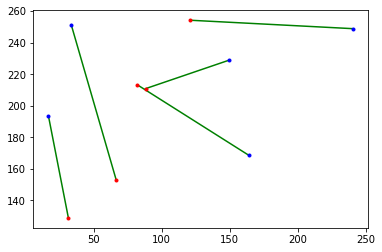

In [102]:
# Plot a green line between pairs of actual points (red) and estimated points (magenta)
nPoint = pts1Cart.shape[1]
for cPoint in range(0, nPoint):
    plt.plot([pts1Cart[0,cPoint], pts2Cart[0,cPoint]], [pts1Cart[1,cPoint], pts2Cart[1,cPoint]],'g-')
    plt.plot(pts1Cart[0,cPoint],pts1Cart[1,cPoint],'b.', pts2Cart[0,cPoint],pts2Cart[1,cPoint],'r.') 

plt.show()

Now our goal is to estimate the homography that maps the first points to the second set of points.

# ****TO DO****: Fill in the details of these routines (solveAXEqualsZero and calcBestHomography). 

In [94]:
def solveAXEqualsZero(A):
    # TO DO: Write this routine - it should solve Ah = 0 
    
    # The cross product of two sides([x,y,1] and transforming matrix h * [u,v,1])
    # is zero: X * h W = 0, which can be solved as the form Ah = 0
    # and h can be obtained by SVD decomposition: A = U * L * Vt
    # then taking the last column of V (the transpose of Vt) as h
    
    h = np.zeros(shape = [np.size(A),1])
    [U,L,Vt] = np.linalg.svd(A)
    V = np.transpose(Vt)
    h = V[:,-1]
    return h

In [95]:
# This function should apply the direct linear transform (DLT) algorithm to calculate the best 
# homography that maps the points in pts1Cart to their corresonding matching in pts2Cart
def calcBestHomography(pts1Cart, pts2Cart):    
    # TO DO: replace this
    # H = 
    
    # TO DO: 
    
    # When viewing a fronto-parallel plane at a known distance D, the points are on a plane
    # so w can be seen as 0 so [u,v,w] can be simplified as [u,v]
    
    # First convert points into homogeneous representation
    # by appending a row of 1 to the original point coordinates to form [x,y,1] and [u,v,1]
    pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)
    pts2Hom = np.concatenate((pts2Cart, np.ones((1,pts2Cart.shape[1]))), axis=0)
    
    # Then construct the matrix A, size (n_points,9)  
    n_points = np.shape(pts1Hom)[1]
    A = np.zeros(shape = [n_points*2,9])
    for n in range(n_points):
        A[2*n,[0,1,2]] = 0
        A[2*n,[3,4,5]] = -pts1Hom[:,n]
        A[2*n,[6,7,8]] = pts1Hom[:,n] * pts2Hom[1,n]
        A[2*n+1,[0,1,2]] = pts1Hom[:,n]
        A[2*n+1,[3,4,5]] = 0
        A[2*n+1,[6,7,8]] = -pts1Hom[:,n] * pts2Hom[0,n]
    
    # Solve Ah = 0
    h = solveAXEqualsZero(A)
    # Reshape h into the matrix H, values of h go first into rows of H
    h_width = np.sqrt(np.size(h))
    h_width = int(h_width)
    H = np.reshape(h,[h_width,h_width])
    return H

Once you have completed the two routines above, we will see how well they work by applying the mapping and measuring the square distance between the desired and actual positions

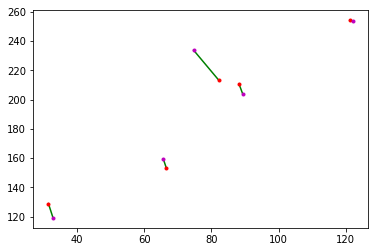

In [103]:
# TO DO: Fill in the details of this function from above 
# use the above function to calculate the best homography 
# that maps the points in pts1Cart to their corresonding matching in pts2Cart
HEst = calcBestHomography(pts1Cart, pts2Cart)

# Apply estimated homography to pts1 to get estimated pts2
pts2EstHom = np.matmul(HEst,pts1Hom)

# Convert back to Cartesian coordinates
# x = x' / z'
# y = y' / z'
pts2EstCart = pts2EstHom[0:2,:] / np.tile([pts2EstHom[2,:]],(2,1))

# Calculate the mean squared distance from actual points
sqDiff = np.mean(sum((pts2Cart - pts2EstCart)**2))

# Draw figure with points before and after applying the estimated homography
nPoint = pts1Cart.shape[1]

# Plot a green line between pairs of actual points (red) and estimated points (magenta)
for cPoint in range(0, nPoint):
    plt.plot([pts2Cart[0,cPoint], pts2EstCart[0,cPoint]], [pts2Cart[1,cPoint], pts2EstCart[1,cPoint]],'g-')
    plt.plot(pts2Cart[0,cPoint],pts2Cart[1,cPoint],'r.',pts2EstCart[0,cPoint],pts2EstCart[1,cPoint],'m.') 

plt.show()

# Other things **** TO DO ****

1: Convince yourself that the homography is ambiguous up to scale (by
multiplying it by a constant factor and showing it does the same thing).
Can you see why this is the case mathematically?

2: Show empirically that your homography routine can map any four points exactly to any
other four points

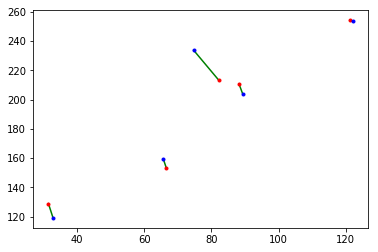

In [104]:
# multiply the estimated homography by a constant factor to change the scale
HEst_new = HEst * np.random.randn(1)

# Apply the new estimated homography to pts1 to get a new group of estimated pts2
pts2EstHom_new = np.matmul(HEst_new,pts1Hom)

# Convert back to Cartesian coordinates
pts2EstCart_new = pts2EstHom_new[0:2,:] / np.tile([pts2EstHom_new[2,:]],(2,1))

# Calculate the mean squared distance from actual points
sqDiff = np.mean(sum((pts2Cart - pts2EstCart_new)**2))

# Draw figure with points before and after applying the estimated homography
nPoint = pts1Cart.shape[1]

# Plot a green line between pairs of actual points (red) and new estimated points (blue)
for cPoint in range(0, nPoint):
    plt.plot([pts2Cart[0,cPoint], pts2EstCart_new[0,cPoint]], [pts2Cart[1,cPoint], pts2EstCart_new[1,cPoint]],'g-')
    plt.plot(pts2Cart[0,cPoint],pts2Cart[1,cPoint],'r.',pts2EstCart_new[0,cPoint],pts2EstCart_new[1,cPoint],'b.') 

plt.show()

The above figure shows exactly the same as the figure before that containing true pts2 and first group of estimated pts2. This proves that the homography is ambiguous up to scale. The reason is that when converting homogeneous coordinates back to Cartesian coordinates, x = x' / z' and y = y' / z', where x', y' and z' are all multiplied by the constant, so the constant will be eliminated.

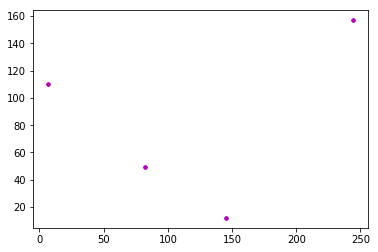

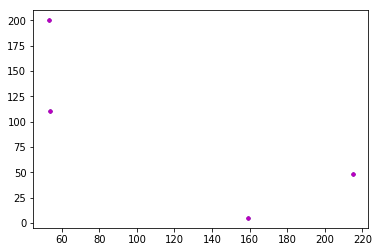

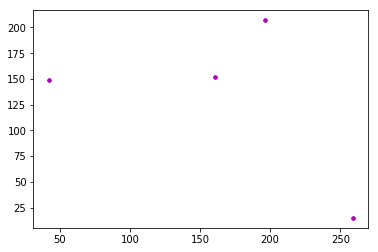

In [57]:
for iTime in range(3):
    
    # randomly generate two groups of four points
    pts3Cart = np.random.randint(low = 0, high = 300, size = [2,4])
    pts4Cart = np.random.randint(low = 0, high = 300, size = [2,4])
    
    # compute the estimated homography using two groups of point
    HEst = calcBestHomography(pts3Cart, pts4Cart)
    
    # Apply estimated homography to pts3 to get estimated pts4
    pts3Hom = np.concatenate((pts3Cart, np.ones((1,pts3Cart.shape[1]))), axis=0)
    pts4EstHom = np.matmul(HEst,pts3Hom)

    # Convert back to Cartesian coordinates
    pts4EstCart = pts4EstHom[0:2,:] / np.tile([pts4EstHom[2,:]],(2,1))

    # Draw figure with points before and after applying the estimated homography
    nPoint = pts3Cart.shape[1]

    # Plot two pairs of first group of points (red), the second group of points (megenta)
    # and the estimated second group of points (blue)
    # the green lines show the mapping between them
    for cPoint in range(0, nPoint):
#         plt.plot([pts3Cart[0,cPoint], pts4EstCart[0,cPoint]], [pts3Cart[1,cPoint], pts4EstCart[1,cPoint]],'g-')
        plt.plot(pts4Cart[0,cPoint],pts4Cart[1,cPoint],'r.',pts4EstCart[0,cPoint],pts4EstCart[1,cPoint],'b.', \
                pts4Cart[0,cPoint],pts4Cart[1,cPoint],'m.') 

    plt.show()

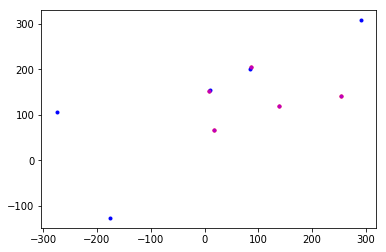

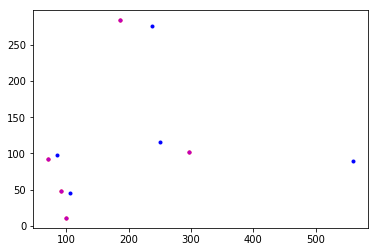

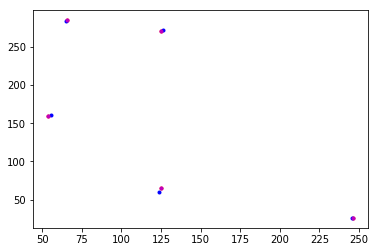

In [107]:
for iTime in range(3):
    
    # randomly generate two groups of four points
    pts3Cart = np.random.randint(low = 0, high = 300, size = [2,5])
    pts4Cart = np.random.randint(low = 0, high = 300, size = [2,5])
    
    # compute the estimated homography using two groups of point
    HEst = calcBestHomography(pts3Cart, pts4Cart)
    
    # Apply estimated homography to pts3 to get estimated pts4
    pts3Hom = np.concatenate((pts3Cart, np.ones((1,pts3Cart.shape[1]))), axis=0)
    pts4EstHom = np.matmul(HEst,pts3Hom)

    # Convert back to Cartesian coordinates
    pts4EstCart = pts4EstHom[0:2,:] / np.tile([pts4EstHom[2,:]],(2,1))

    # Draw figure with points before and after applying the estimated homography
    nPoint = pts3Cart.shape[1]

    # Plot two pairs of first group of points (red), the second group of points (megenta)
    # and the estimated second group of points (blue)
    # the green lines show the mapping between them
    for cPoint in range(0, nPoint):
#         plt.plot([pts3Cart[0,cPoint], pts4EstCart[0,cPoint]], [pts3Cart[1,cPoint], pts4EstCart[1,cPoint]],'g-')
        plt.plot(pts4Cart[0,cPoint],pts4Cart[1,cPoint],'r.',pts4EstCart[0,cPoint],pts4EstCart[1,cPoint],'b.', \
                pts4Cart[0,cPoint],pts4Cart[1,cPoint],'m.') 

    plt.show()

In the above figures, they show that using this homography routine can map any group of four points exactly to any other group of four points, but cannot map two groups of five points correctly. Because there are 9 parameters to calculate in the homography matrix but has 10 equations(two equations per point) so the solution is inaccurate.